In [ ]:
import sklearn
import keras
import nltk
import pandas as pd
import numpy as np
import re
import codecs
import nltk
import re
import pprint
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')







[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
import gensim.downloader as api

word2vec= api.load('word2vec-google-news-300')


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
jan = pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByState_2020-01-01_2020-01-31.tsv", sep='\t', header=0)

#feb = pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByCountry_2020-02-01_2020-02-29.tsv", sep='\t', header=0)

mar = pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByState_2020-03-01_2020-03-31.tsv", sep='\t', header=0)

apr = pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByState_2020-04-01_2020-04-30.tsv", sep='\t', header=0)

may = pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByState_2020-05-01_2020-05-31.tsv", sep='\t', header=0)

jun = pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByState_2020-06-01_2020-06-30.tsv", sep='\t', header=0)

#jul =pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByState_2020-07-01_2020-07-31.tsv", sep='\t', header=0)

#aug = pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByState_2020-08-01_2020-08-31.tsv", sep='\t', header=0)

#sep = pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByState_2020-09-01_2020-09-30.tsv", sep='\t', header=0)

#oct = pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByState_2020-10-01_2020-10-31.tsv", sep='\t', header=0)

#nov = pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByState_2020-11-01_2020-11-30.tsv", sep='\t', header=0)

#dec = pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByState_2020-12-01_2020-12-31.tsv", sep='\t', header=0)

#jan21= pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2021/QueriesByState_2021-01-01_2021-01-31.tsv", sep='\t', header=0)


In [ ]:
df = pd.concat([jan, mar, apr, may, jun], ignore_index=True)





In [ ]:
print(df.sample(5))

               Date  ... PopularityScore
752240   2020-03-21  ...             100
120175   2020-03-05  ...               1
2496345  2020-06-03  ...               2
628084   2020-03-18  ...              16
1602871  2020-04-15  ...               1

[5 rows x 6 columns]


In [ ]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].str.replace(r"[^a-zA-Z]", " ")# Search for all non-letters,  Replace all non-letters with spaces
    return df



In [ ]:
questions = standardize_text(df, "Query")

questions.to_csv("clean_data.csv")
questions.head()

,Date,Query,IsImplicitIntent,State,Country,PopularityScore
0,2020-01-01,coronavirus,False,Michigan,United States,1
1,2020-01-01,coronavirus,False,Pennsylvania,United States,1
2,2020-01-01,p masks,True,Australian Capital Territory,Australia,1
3,2020-01-01,ausw rtiges amt,True,North Rhine-Westphalia,Germany,1
4,2020-01-01,p masks,True,New South Wales,Australia,1


In [ ]:
clean_questions1= pd.read_csv("clean_data.csv")
clean_questions1.tail()



,Unnamed: 0,Date,Query,IsImplicitIntent,State,Country,PopularityScore
2949623,2949623,2020-06-30,nzta,True,Waikato,New Zealand,1
2949624,2949624,2020-06-30,virginia coronavirus,False,Virginia,United States,46
2949625,2949625,2020-06-30,de morgen,True,Brussels Region,Belgium,26
2949626,2949626,2020-06-30,kdhe covid,False,Kansas,United States,2
2949627,2949627,2020-06-30,nationwide building society,True,Lanarkshire,United Kingdom,13


In [ ]:
clean_questions = clean_questions1.loc[clean_questions1.Query.str.contains("how", na=False)]

In [ ]:
clean_questions['Query']=clean_questions['Query'].apply(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
corpus = clean_questions.loc[(clean_questions.Country== "United States") & (clean_questions.Country== "United Kingdom")]

In [ ]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

clean_questions["tokens"] = clean_questions['Query'].apply(tokenizer.tokenize)
clean_questions.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Unnamed: 0,Date,Query,IsImplicitIntent,State,Country,PopularityScore,tokens
8347,8347,2020-01-24,how did the coronavirus start,False,Texas,United States,1,"[how, did, the, coronavirus, start]"
9111,9111,2020-01-24,how is coronavirus spread,False,New York,United States,1,"[how, is, coronavirus, spread]"
9116,9116,2020-01-24,how is the coronavirus transmitted,False,New York,United States,1,"[how, is, the, coronavirus, transmitted]"
9346,9346,2020-01-24,how is coronavirus spread,False,Illinois,United States,1,"[how, is, coronavirus, spread]"
9356,9356,2020-01-24,how is coronavirus transmitted,False,Illinois,United States,1,"[how, is, coronavirus, transmitted]"


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

all_words = [word for tokens in clean_questions["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in clean_questions["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

305112 words total, with a vocabulary size of 757
Max sentence length is 34


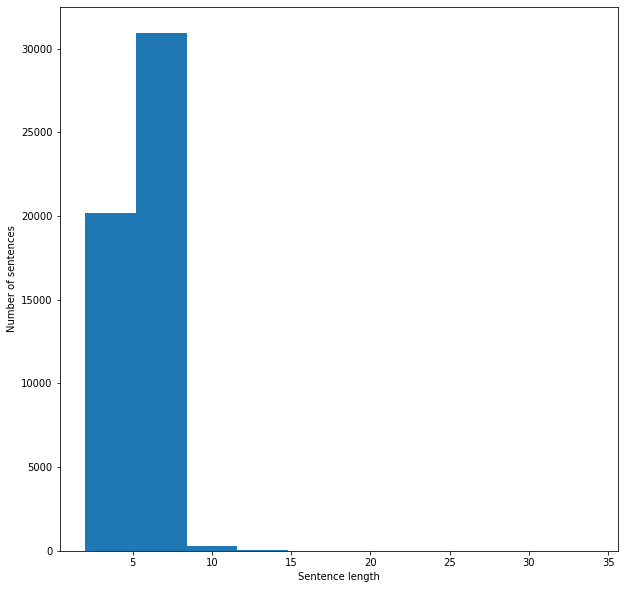

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    Tfidf_vectorizer = TfidfVectorizer()

    emb = Tfidf_vectorizer.fit_transform(data)

    return emb, Tfidf_vectorizer

list_corpus = clean_questions["Query"].tolist()
list_labels = clean_questions["IsImplicitIntent"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)

X_train_counts, Tfidf_vectorizer = cv(X_train)
X_test_counts = Tfidf_vectorizer.transform(X_test)

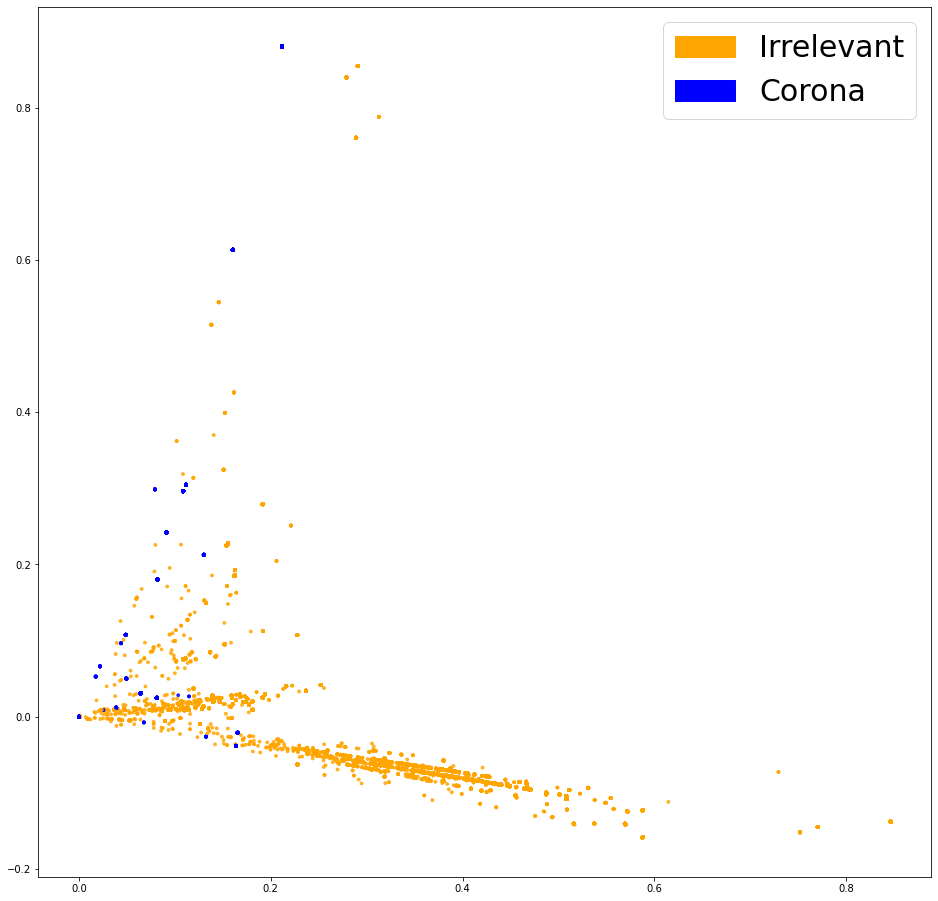

In [ ]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='orange', label='Irrelevant')
            green_patch = mpatches.Patch(color='blue', label='Corona')
            plt.legend(handles=[red_patch, green_patch], prop={'size': 30})


fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_counts, y_train)
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', 
                         #n_jobs=-1,
                         random_state=40)
clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_test_counts)


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 1.000, precision = 1.000, recall = 1.000, f1 = 1.000


In [ ]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

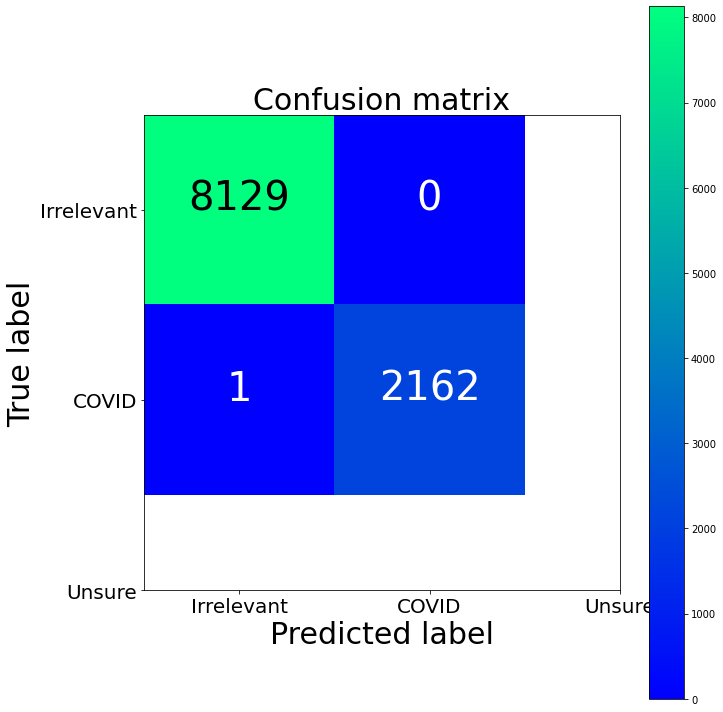

[[8129    0]
 [   1 2162]]


In [ ]:
cm = confusion_matrix(y_test, y_predicted_counts)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Irrelevant','COVID','Unsure'], normalize=False, title='Confusion matrix')
plt.show()
print(cm)

In [ ]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[-n:], key = lambda x : x[0])
        bottom = sorted_coeff[:n]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(Tfidf_vectorizer, clf, 15)

In [ ]:
importance


{0: {'bottom': [(5.502266189580958, 'unemployment'),
   (4.265551931868567, 'lockdown'),
   (3.797783846448928, 'flu'),
   (3.7205852756478563, 'to'),
   (3.540845724089874, 'check'),
   (3.288088229978159, 'stimulus'),
   (3.258524613693463, 'apply'),
   (2.909784352803488, 'die'),
   (2.8942064868523403, 'file'),
   (2.876451364840668, 'closed'),
   (2.813923344014836, 'hand'),
   (2.813923344014836, 'sanitizer'),
   (2.7631700660240415, 'browne'),
   (2.7631700660240415, 'rodney'),
   (2.6139153204802725, 'schools')],
  'tops': [(-26.955124532514922, 'coronavirus'),
   (-5.8095265878602005, 'covid'),
   (-5.630802591519913, 'corona'),
   (-2.550986901069695, 'for'),
   (-2.410087829247664, 'due'),
   (-2.2638232483939404, 'in'),
   (-2.102405804966886, 'corna'),
   (-1.745713488845286, 'cases'),
   (-1.7310631823547429, 'from'),
   (-1.5902564160240054, 'survive'),
   (-1.5190779282256188, 'of'),
   (-1.511560446430542, 'does'),
   (-1.418605810340414, 'objects'),
   (-1.29329673618

In [ ]:
  def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Relevant', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Irrelevant', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()



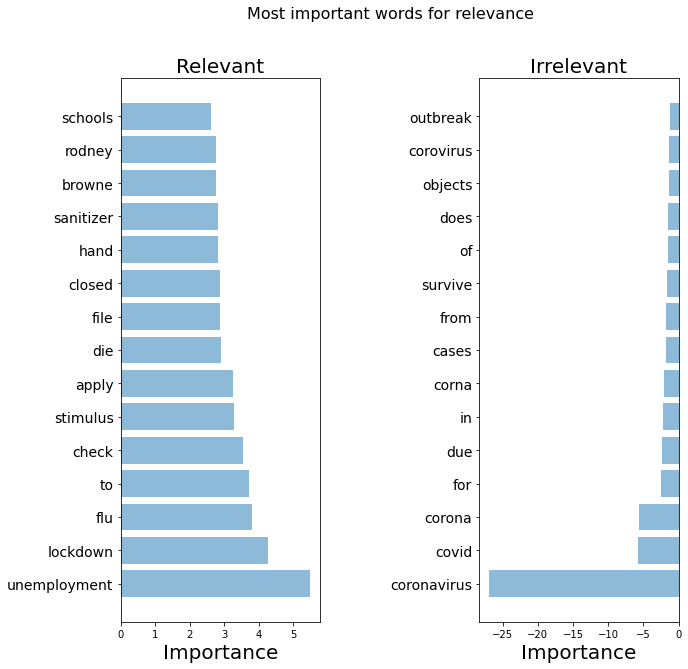

In [ ]:
top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

In [ ]:
#define vocab
from collections import Counter
vocab = Counter()

min_occurane = 2
tokens = [k for k,c in vocab.items() if c >= min_occurane]
print(len(clean_questions['tokens']))

51456


In [ ]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_questions, generate_missing=False):
    embeddings = clean_questions['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

**embedding search query **

In [ ]:
#embeddings = get_word2vec_embeddings(word2vec, clean_questions)
#X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(embeddings, list_labels, 
                                                                                        test_size=0.2, random_state=40)

In [ ]:
embeddings = get_word2vec_embeddings(word2vec, clean_questions)



**embedding news data **

In [ ]:
import os
import tweepy as tw
import pandas as pd
import tweepy,json

In [ ]:
consumer_key= ''
consumer_secret= ''
access_token= ''
access_token_secret= ''

auth= tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

NameError: ignored

In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
# Define the search term and the date_since date as variables
search_words= "coronavirus OR covid OR corona OR covid19 OR facemask OR sanitizer OR social-distancing -filter:retweets"
date_since = "2021-01-01"

In [ ]:
# Collect tweets
tweets = tw.Cursor(api.search,
                       q=search_words,
                       lang="en",
                      
                       since=date_since).items(5)

# Collect a list of tweets
tweett =[tweet.text for tweet in tweets]



In [ ]:
tweets = tw.Cursor(api.search, 
                           q=search_words,
                           lang="en",
                           since=date_since).items(1000)

tweett = [[tweet.user.screen_name, tweet.user.location, tweet.created_at, tweet.text] for tweet in tweets]


In [ ]:
tweet_text = pd.DataFrame(data=tweett, 
                    columns=['user', 'location', 'date', 'text'])





In [ ]:
 from pandas import Series
  
#tweet_text['text'].str.split('((?:<a href=")?https?://\S+[^\s,.:;])').apply(Series, 1).stack()
def faster(df):
    s = tweet_text['text'].str.split('((?:<a href=")?https?://\S+[^\s,.:;])', expand=True).stack()
    i = s.index.get_level_values(0)
    df2 = df.loc[i].copy()
    df2["link"] = s.values
    return df2

new=faster(tweet_text)
new
tweet_text1=new[new['link'].str.contains("https")]
tweet_text1 = standardize_text(tweet_text1, "text")


In [ ]:

tweet_text1

,user,location,date,text,link
0,sharmankdee,,2021-05-04 12:52:44,sir we appreciate dp efforts but same time ...,https://t.co/dmJlkoRInj
1,ESPNFC,,2021-05-04 12:52:44,la liga has opened an investigation into wheth...,https://t.co/70UJX0AqvX
2,JonLS53,East Anglia,2021-05-04 12:52:44,not much sign of labour here not even a lea...,https://t.co/b6PbMEOBr1
3,CDNewsDispatch,,2021-05-04 12:52:44,madrid voters go to the polls in covid influen...,https://t.co/dWljVJN7z3
4,bihar__students,,2021-05-04 12:52:43,try to understand the situation here ipl is ...,https://t.co/UudypKpvGe
...,...,...,...,...,...
996,trentchambers4,,2021-05-04 12:49:33,bureaucratic delays in distributing foreign me...,https://t.co/yDkG95eA74
997,Robert_Andrew9,U.S,2021-05-04 12:49:33,launchzone is the flagship project on bsc ...,https://t.co/OCM2LUHeg5
998,Slabodkin,,2021-05-04 12:49:32,mit technology review put at home covid te...,https://t.co/XMFzqzcGqX…
998,Slabodkin,,2021-05-04 12:49:32,mit technology review put at home covid te...,https://t.co/8CWwXkoTp2


In [ ]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

tweet_text1 ["tokens"] = tweet_text1 ["text"].apply(tokenizer.tokenize)

tweet_text1 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,user,location,date,text,link,tokens
0,sharmankdee,,2021-05-04 12:52:44,sir we appreciate dp efforts but same time ...,https://t.co/dmJlkoRInj,"[sir, we, appreciate, dp, efforts, but, same, ..."
1,ESPNFC,,2021-05-04 12:52:44,la liga has opened an investigation into wheth...,https://t.co/70UJX0AqvX,"[la, liga, has, opened, an, investigation, int..."
2,JonLS53,East Anglia,2021-05-04 12:52:44,not much sign of labour here not even a lea...,https://t.co/b6PbMEOBr1,"[not, much, sign, of, labour, here, not, even,..."
3,CDNewsDispatch,,2021-05-04 12:52:44,madrid voters go to the polls in covid influen...,https://t.co/dWljVJN7z3,"[madrid, voters, go, to, the, polls, in, covid..."
4,bihar__students,,2021-05-04 12:52:43,try to understand the situation here ipl is ...,https://t.co/UudypKpvGe,"[try, to, understand, the, situation, here, ip..."
...,...,...,...,...,...,...
996,trentchambers4,,2021-05-04 12:49:33,bureaucratic delays in distributing foreign me...,https://t.co/yDkG95eA74,"[bureaucratic, delays, in, distributing, forei..."
997,Robert_Andrew9,U.S,2021-05-04 12:49:33,launchzone is the flagship project on bsc ...,https://t.co/OCM2LUHeg5,"[launchzone, is, the, flagship, project, on, b..."
998,Slabodkin,,2021-05-04 12:49:32,mit technology review put at home covid te...,https://t.co/XMFzqzcGqX…,"[mit, technology, review, put, at, home, covid..."
998,Slabodkin,,2021-05-04 12:49:32,mit technology review put at home covid te...,https://t.co/8CWwXkoTp2,"[mit, technology, review, put, at, home, covid..."


**bold text** embedding both data

In [ ]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged


def get_word2vec_embeddings1(vectors, mediuim_df, generate_missing=False):
    embeddings1 = mediuim_df['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings1)

In [ ]:
embeddings2= get_word2vec_embeddings1(word2vec, tweet_text1)
#embeddings2

In [ ]:
from scipy.spatial.distance import cosine

# Calculating the distance between the
# embeddings of 'bank' in all the
# given contexts of the word

list_of_distances = []
for text1, embed1 in zip(clean_questions["Query"], embeddings):
    for text2, embed2, link in zip(tweet_text1['text'], embeddings2, tweet_text1["link"]):
        cos_dist =1- cosine(embed1, embed2)
      
        list_of_distances.append([text1, text2, cos_dist, link])

distances_df = pd.DataFrame(list_of_distances, columns=['text1', 'text2', 'distance', "link"]).dropna()
diss = distances_df.sort_values(
     by="distance",
     ascending=False
 )


diss

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [ ]:
result_df = diss.drop_duplicates(subset='text2')
result_df

NameError: ignored

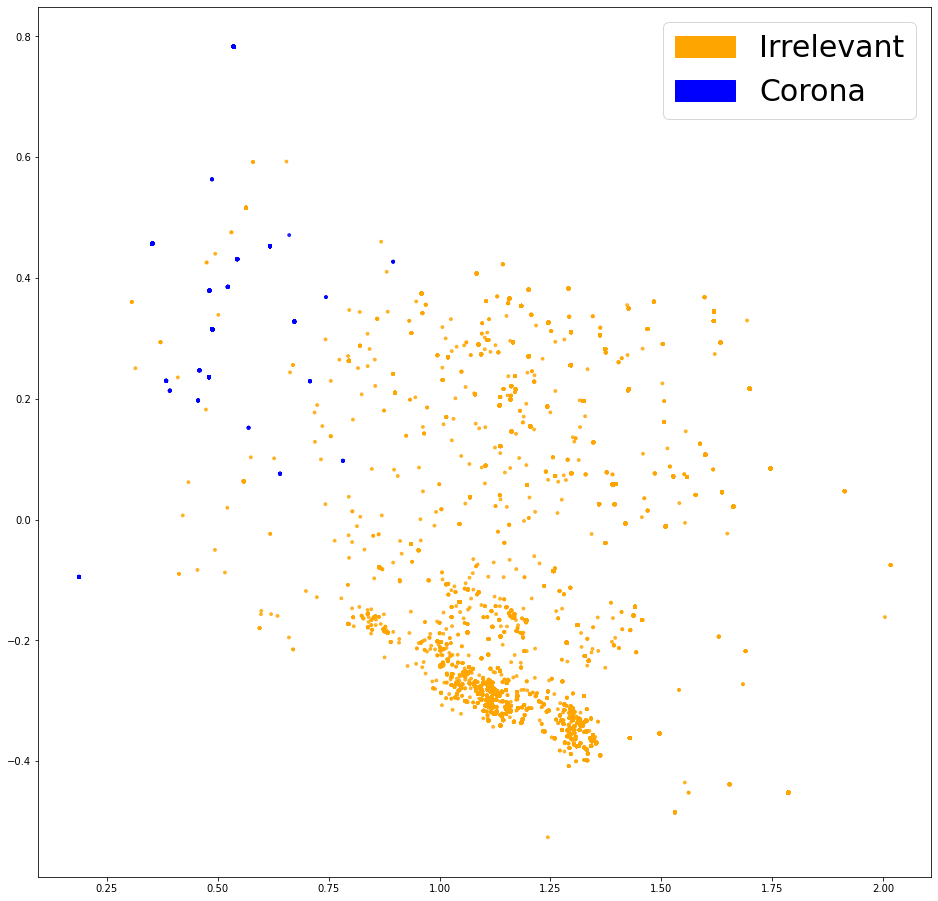

In [ ]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(embeddings, list_labels)
plt.show()

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

EMBEDDING_DIM = 300
MAX_SEQUENCE_LENGTH = 35
VOCAB_SIZE = len(VOCAB)

VALIDATION_SPLIT=.2
tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(clean_questions["Query"].tolist())
sequences = tokenizer.texts_to_sequences(clean_questions["Query"].tolist())

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

cnn_data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = to_categorical(np.asarray(clean_questions["IsImplicitIntent"]))

indices = np.arange(cnn_data.shape[0])
np.random.shuffle(indices)
cnn_data = cnn_data[indices]
labels = labels[indices]
num_validation_samples = int(VALIDATION_SPLIT * cnn_data.shape[0])

embedding_weights = np.zeros((len(word_index)+1, EMBEDDING_DIM))
for word,index in word_index.items():
    embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(embedding_weights.shape)

Found 514 unique tokens.
(515, 300)
